In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
from tqdm import tqdm
from statistics import mean
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
trainData = pd.read_csv("../Data/train.csv", index_col = 0)
testData = pd.read_csv("../Data/test.csv", index_col = 0)
mean_value = trainData['Age'].mean()
trainData['Age'] = trainData['Age'].fillna(trainData['Age'].mean())
testData['Age'] = testData['Age'].fillna(testData['Age'].mean())

testData['Fare'] = testData['Fare'].fillna(testData['Fare'].mean())
testData['Embarked'] = testData['Embarked'].dropna(axis = 0)

testData = testData.dropna(subset = ['Embarked'])
trainData = trainData.dropna(subset = ['Embarked'])
trainData.shape

(889, 11)

In [3]:
#removed age
xTrain = trainData[["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex","Name"]]
yTrain = trainData["Survived"]
xTest = testData[["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex", "Name"]]

In [4]:
print(xTrain.head())

             Pclass  SibSp  Parch     Fare Embarked     Sex  \
PassengerId                                                   
1                 3      1      0   7.2500        S    male   
2                 1      1      0  71.2833        C  female   
3                 3      0      0   7.9250        S  female   
4                 1      1      0  53.1000        S  female   
5                 3      0      0   8.0500        S    male   

                                                          Name  
PassengerId                                                     
1                                      Braund, Mr. Owen Harris  
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  
3                                       Heikkinen, Miss. Laina  
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  
5                                     Allen, Mr. William Henry  


In [5]:
xTrain['Title'] = xTrain['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
xTest['Title'] = xTest['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

xTest.drop(["Name"],axis = 1, inplace = True)
xTrain.drop(["Name"],axis = 1, inplace = True)

c:\users\ariel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\ariel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ariel\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

In [6]:
# Substitute rare female titles
xTrain['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
xTest['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
# Substitute rare male titles
xTrain['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
xTest['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

c:\users\ariel\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [7]:
print(xTrain.head())

             Pclass  SibSp  Parch     Fare Embarked     Sex Title
PassengerId                                                      
1                 3      1      0   7.2500        S    male    Mr
2                 1      1      0  71.2833        C  female   Mrs
3                 3      0      0   7.9250        S  female  Miss
4                 1      1      0  53.1000        S  female   Mrs
5                 3      0      0   8.0500        S    male    Mr


In [8]:
LE = LabelEncoder()
xTrain['Title'] = LE.fit_transform(xTrain['Title'])
xTrain['Embarked'] = LE.fit_transform(xTrain['Embarked'])
xTrain['Sex'] = LE.fit_transform(xTrain['Sex'])


xTest['Title'] = LE.fit_transform(xTest['Title'])
xTest['Embarked'] = LE.fit_transform(xTest['Embarked'])
xTest['Sex'] = LE.fit_transform(xTest['Sex'])

c:\users\ariel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ariel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ariel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [9]:
print(xTest.head())

             Pclass  SibSp  Parch     Fare  Embarked  Sex  Title
PassengerId                                                     
892               3      0      0   7.8292         1    1      3
893               3      1      0   7.0000         2    0      4
894               2      0      0   9.6875         1    1      3
895               3      0      0   8.6625         2    1      3
896               3      1      1  12.2875         2    0      4


c:\users\ariel\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


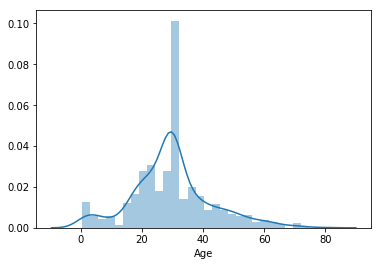

In [10]:
# SD for Age
ageSD = trainData["Age"].std()
ax = sns.distplot(trainData["Age"])

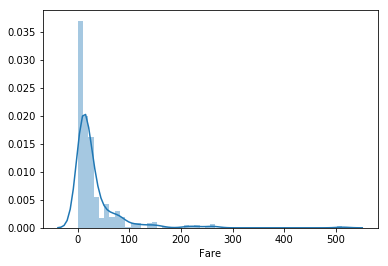

In [11]:
# SD for Fare
fareSD = trainData["Fare"].std()
a = sns.distplot(trainData["Fare"])

In [12]:
#remove outliers 2 SD from the mean for Age and Fare
ageMean = trainData["Age"].mean()
fareMean = trainData["Fare"].mean()
print(fareMean+2*fareSD)
print(fareMean-2*fareSD)
print(ageMean+3*ageSD)
#creating new dataframe without the anomalies
#ageRemoved_up = trainData.loc[trainData['Age'] <= ageMean+2*ageSD, ["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex","Name","Age","Survived"]]
#ageRemoved = ageRemoved_up.loc[ageRemoved_up['Age'] >= ageMean-2*ageSD, ["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex","Name","Age","Survived"]]
fareRemoved_up = trainData.loc[trainData['Fare'] <= fareMean+3*fareSD, ["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex","Name","Survived"]]
fareRemoved = fareRemoved_up.loc[fareRemoved_up['Fare'] >= fareMean-3*fareSD, ["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex","Name","Survived"]]



131.49168951080622
-67.2983277560256
68.55854529843121


In [13]:
fareRemoved['Title'] = fareRemoved['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

fareRemoved.drop(["Name"],axis = 1, inplace = True)

# Substitute rare female titles
fareRemoved['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
# Substitute rare male titles
fareRemoved['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

LE = LabelEncoder()
fareRemoved['Title'] = LE.fit_transform(fareRemoved['Title'])
fareRemoved['Embarked'] = LE.fit_transform(fareRemoved['Embarked'])
fareRemoved['Sex'] = LE.fit_transform(fareRemoved['Sex'])




In [14]:
#creating new frames
xTrain_noFareAge = fareRemoved[["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex","Title"]]
yTrain_noFareAge = fareRemoved["Survived"]

In [15]:
xTrain_noFareAge.head(40)

,Pclass,SibSp,Parch,Fare,Embarked,Sex,Title
PassengerId,,,,,,,
1,3,1,0,7.2500,2,1,3
2,1,1,0,71.2833,0,0,4
3,3,0,0,7.9250,2,0,2
4,1,1,0,53.1000,2,0,4
5,3,0,0,8.0500,2,1,3
6,3,0,0,8.4583,1,1,3
7,1,0,0,51.8625,2,1,3
8,3,3,1,21.0750,2,1,1
9,3,0,2,11.1333,2,0,4


In [16]:
fareRemoved.shape

(869, 8)